### Amazon Book Reviews: Segmenting Reviewers 

The original dataset has ~9 million reviews: http://jmcauley.ucsd.edu/data/amazon/.  I have created a subset which contains data of top 50 reviewers who have done maximum number of reviews. From the top 50 review dataset I made a summary table which contains the number of reviews, total & helpful votes received, text length & average length and helpfulness ratings for each of the top 50 reviewer. Here we will cluster the reviewers based on these features.

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [32]:
df = pd.read_csv("top50_summary_table.csv")

In [33]:
df = df.drop("Unnamed: 0", axis = 1)
df.head()

,reviewerID,reviewerName,numReviews,totalVote,helpfulVote,wordLength,meanLength,percHelpful
0,AFVQZQ8PW0L,Harriet Klausner,23212,130761,95387,5841902,251.675943,0.653315
1,A14OJS0VWMOSWO,Midwest Book Review,16090,109000,89336,1620098,100.689745,0.659227
2,A2F6N60Z96CAJI,Bookreporter,5878,42720,35865,3505967,596.455767,0.677867
3,A320TMDV6KCFU,MNix,4209,14244,12224,1508548,358.410074,0.586845
4,AHUT55E980RDR,Neal C. Reynolds,3061,5904,4555,331795,108.394316,0.425362


In [34]:
x_cols = df.ix[:, 2:]
x_cols.head()

,numReviews,totalVote,helpfulVote,wordLength,meanLength,percHelpful
0,23212,130761,95387,5841902,251.675943,0.653315
1,16090,109000,89336,1620098,100.689745,0.659227
2,5878,42720,35865,3505967,596.455767,0.677867
3,4209,14244,12224,1508548,358.410074,0.586845
4,3061,5904,4555,331795,108.394316,0.425362


#### Standardization and PCA

In [35]:
from sklearn import preprocessing
std_scale = preprocessing.StandardScaler().fit(x_cols)
x_cols_std = std_scale.transform(x_cols)

In [36]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
df["PC1"] = pca.fit_transform(x_cols_std)[:, 0]
df["PC2"] = pca.fit_transform(x_cols_std)[:, 1]
df.head(2)

,reviewerID,reviewerName,numReviews,totalVote,helpfulVote,wordLength,meanLength,percHelpful,PC1,PC2
0,AFVQZQ8PW0L,Harriet Klausner,23212,130761,95387,5841902,251.675943,0.653315,9.558535,-2.464989
1,A14OJS0VWMOSWO,Midwest Book Review,16090,109000,89336,1620098,100.689745,0.659227,5.825801,-2.333096


In [37]:
pca.explained_variance_ratio_

array([ 0.60954372,  0.22996119])

In [38]:
pca1 = PCA().fit(x_cols_std)
pca1.explained_variance_ratio_

array([ 0.60954372,  0.22996119,  0.11140198,  0.03929468,  0.00896058,
        0.00083784])

### KMeans clustering

In [45]:
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters = 4, random_state=123, n_init=10)
df["clusterID"] = k_means.fit_predict(x_cols_std)
df.head(2)

,reviewerID,reviewerName,numReviews,totalVote,helpfulVote,wordLength,meanLength,percHelpful,PC1,PC2,clusterID
0,AFVQZQ8PW0L,Harriet Klausner,23212,130761,95387,5841902,251.675943,0.653315,9.558535,-2.464989,2
1,A14OJS0VWMOSWO,Midwest Book Review,16090,109000,89336,1620098,100.689745,0.659227,5.825801,-2.333096,2


In [46]:
centroids = k_means.cluster_centers_
centroids_ts = pca.transform(centroids)

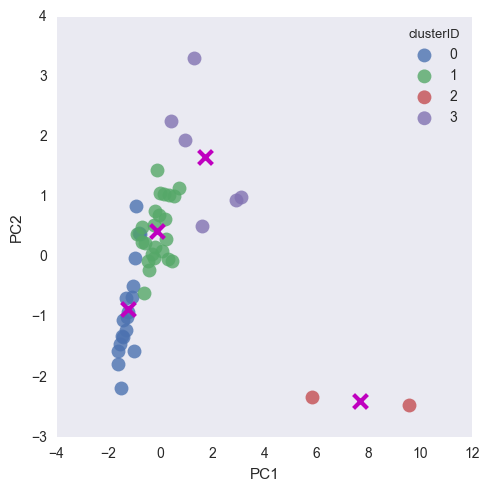

In [47]:
sns.set_style("dark")
sns.lmplot(x = 'PC1', y = 'PC2', hue = "clusterID", data=df, fit_reg= False, scatter_kws={"s": 100}, legend_out= False) 
plt.scatter(centroids_ts[:, 0], centroids_ts[:, 1], marker = "x", color = 'm', s=100, linewidths=3)

#### We can color code each reviewer

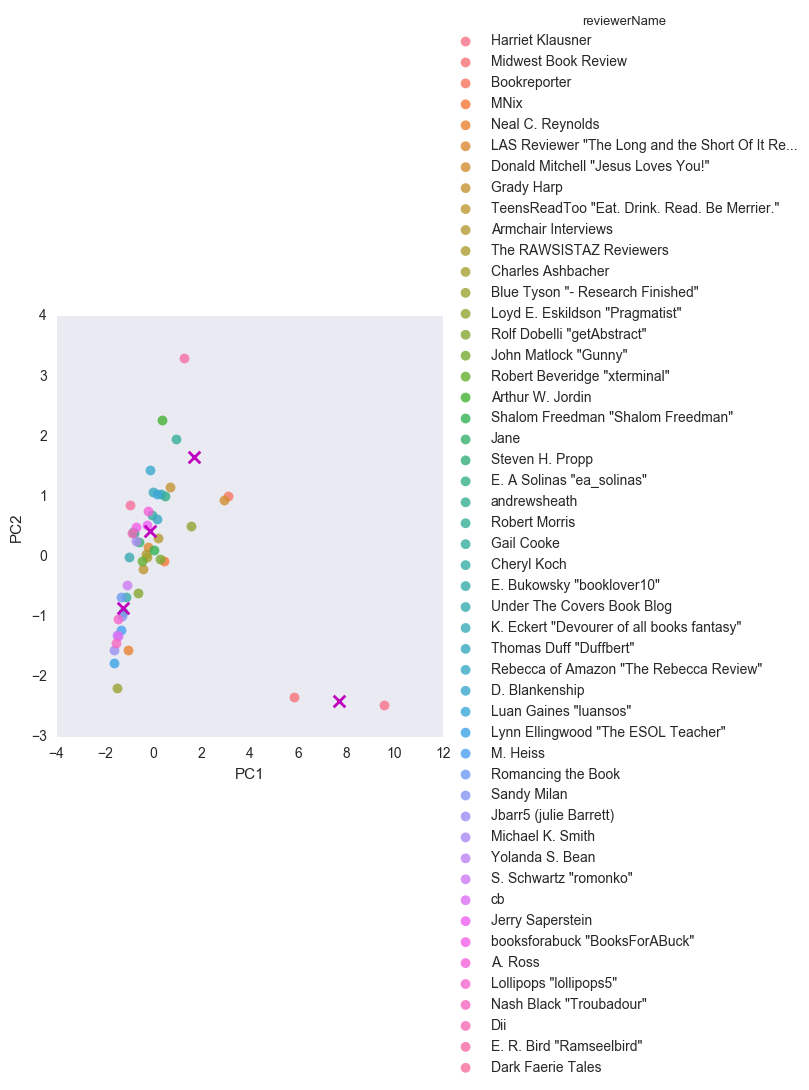

In [48]:
sns.lmplot(x = 'PC1', y = 'PC2', hue = "reviewerName", data=df, fit_reg= False, scatter_kws={"s": 50}) 
plt.scatter(centroids_ts[:, 0], centroids_ts[:, 1], marker = "x", color = 'm', s=70, linewidths=2)

The above plot is not very helpful. Let's check # of reviewers in each cluster 

In [49]:
df.clusterID.value_counts()

1    24
0    18
3     6
2     2
Name: clusterID, dtype: int64

In [50]:
df[df.clusterID == 2]

,reviewerID,reviewerName,numReviews,totalVote,helpfulVote,wordLength,meanLength,percHelpful,PC1,PC2,clusterID
0,AFVQZQ8PW0L,Harriet Klausner,23212,130761,95387,5841902,251.675943,0.653315,9.558535,-2.464989,2
1,A14OJS0VWMOSWO,Midwest Book Review,16090,109000,89336,1620098,100.689745,0.659227,5.825801,-2.333096,2


In [52]:
df_3 = df[df.clusterID == 1] # we can do another cluster within this cluster of 24 reviewers

In [53]:
df3 = df_3.copy()

In [54]:
df3 = df3.drop(['PC1', 'PC2', 'clusterID'], axis = 1)

In [55]:
x_cols_3 = df3.ix[:, 2:]
std_scale = preprocessing.StandardScaler().fit(x_cols_3)
x_cols_3_std = std_scale.transform(x_cols_3)
pca = PCA(n_components=2)
df3["PC1"] = pca.fit_transform(x_cols_3_std)[:, 0]
df3["PC2"] = pca.fit_transform(x_cols_3_std)[:, 1]
k_means = KMeans(n_clusters = 4)
df3["clusterID"] = k_means.fit_predict(x_cols_3_std)
df3.head(2)

,reviewerID,reviewerName,numReviews,totalVote,helpfulVote,wordLength,meanLength,percHelpful,PC1,PC2,clusterID
3,A320TMDV6KCFU,MNix,4209,14244,12224,1508548,358.410074,0.586845,2.795529,3.566505,2
5,A13QTZ8CIMHHG4,"LAS Reviewer ""The Long and the Short Of It Re...",2948,6464,5691,1244302,422.083446,0.532196,3.284221,1.506345,2


In [56]:
df3.clusterID.value_counts()

1    9
0    9
3    4
2    2
Name: clusterID, dtype: int64

### Find the similarities among top 50 reviewers 

In [58]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import MDS

In [61]:
dist_all = 1 - cosine_similarity(x_cols_std)

mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)
pos_all = mds.fit_transform(dist_all)  # shape (n_components, n_samples)

df['x_mds'] = pos_all[:, 0]
df['y_mds'] = pos_all[:, 1]
df.head(2)

,reviewerID,reviewerName,numReviews,totalVote,helpfulVote,wordLength,meanLength,percHelpful,PC1,PC2,clusterID,x_mds,y_mds
0,AFVQZQ8PW0L,Harriet Klausner,23212,130761,95387,5841902,251.675943,0.653315,9.558535,-2.464989,2,-0.439528,-1.013474
1,A14OJS0VWMOSWO,Midwest Book Review,16090,109000,89336,1620098,100.689745,0.659227,5.825801,-2.333096,2,-0.631226,-0.879084


In [66]:
df_all = df.drop(["reviewerID", "numReviews", "totalVote","helpfulVote", "wordLength", "meanLength","percHelpful", "PC1", "PC2"], axis = 1)
df_all.head(2)

,reviewerName,clusterID,x_mds,y_mds
0,Harriet Klausner,2,-0.439528,-1.013474
1,Midwest Book Review,2,-0.631226,-0.879084


In [67]:
import mpld3

In [68]:
#set up colors per clusters using a dict
cluster_colors = {0: '#1b9e77', 1: '#d95f02', 2: '#7570b3', 3: '#e7298a'}

#set up cluster names using a dict
cluster_names = {0: 'cluster 0', 
                 1: 'cluster 1', 
                 2: 'cluster 2', 
                 3: 'cluster 3'}

In [71]:
#define custom toolbar location
class TopToolbar(mpld3.plugins.PluginBase):
    """Plugin for moving toolbar to top of figure"""

    JAVASCRIPT = """
    mpld3.register_plugin("toptoolbar", TopToolbar);
    TopToolbar.prototype = Object.create(mpld3.Plugin.prototype);
    TopToolbar.prototype.constructor = TopToolbar;
    function TopToolbar(fig, props){
        mpld3.Plugin.call(this, fig, props);
    };

    TopToolbar.prototype.draw = function(){
      // the toolbar svg doesn't exist
      // yet, so first draw it
      this.fig.toolbar.draw();

      // then change the y position to be
      // at the top of the figure
      this.fig.toolbar.toolbar.attr("x", 150);
      this.fig.toolbar.toolbar.attr("y", 400);

      // then remove the draw function,
      // so that it is not called again
      this.fig.toolbar.draw = function() {}
    }
    """
    def __init__(self):
        self.dict_ = {"type": "toptoolbar"}

In [72]:
groups = df_all.groupby('clusterID')

#define custom css to format the font and to remove the axis labeling
css = """
text.mpld3-text, div.mpld3-tooltip {
  font-family:Arial, Helvetica, sans-serif;
}

g.mpld3-xaxis, g.mpld3-yaxis {
display: none; }

svg.mpld3-figure {
margin-left: -200px;}
"""

# Plot 
fig, ax = plt.subplots(figsize=(14, 7)) #set plot size
ax.margins(0.25) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups:
    points = ax.plot(group['x_mds'], group['y_mds'], marker='o', linestyle='', ms=12, 
                     label=cluster_names[name], mec='none',
                     color=cluster_colors[name])
    ax.set_aspect('auto')
    labels = [i for i in group.reviewerName]
    
    #set tooltip using points, labels and the already defined 'css'
    tooltip = mpld3.plugins.PointHTMLTooltip(points[0], labels,
                                       voffset=10, hoffset=10, css=css)
    #connect tooltip to fig
    mpld3.plugins.connect(fig, tooltip, TopToolbar())    
    
    #set tick marks as blank
    ax.axes.get_xaxis().set_ticks([])
    ax.axes.get_yaxis().set_ticks([])
    
    #set axis as blank
    #ax.axes.get_xaxis().set_visible(True)
    #ax.axes.get_yaxis().set_visible(True)

    
ax.legend(numpoints=1) #show legend with only one dot

mpld3.display() #show the plot
#mpld3.save_html(fig, "my_fig.html")
#uncomment the below to export to html
#html = mpld3.fig_to_html(fig)
#print(html)

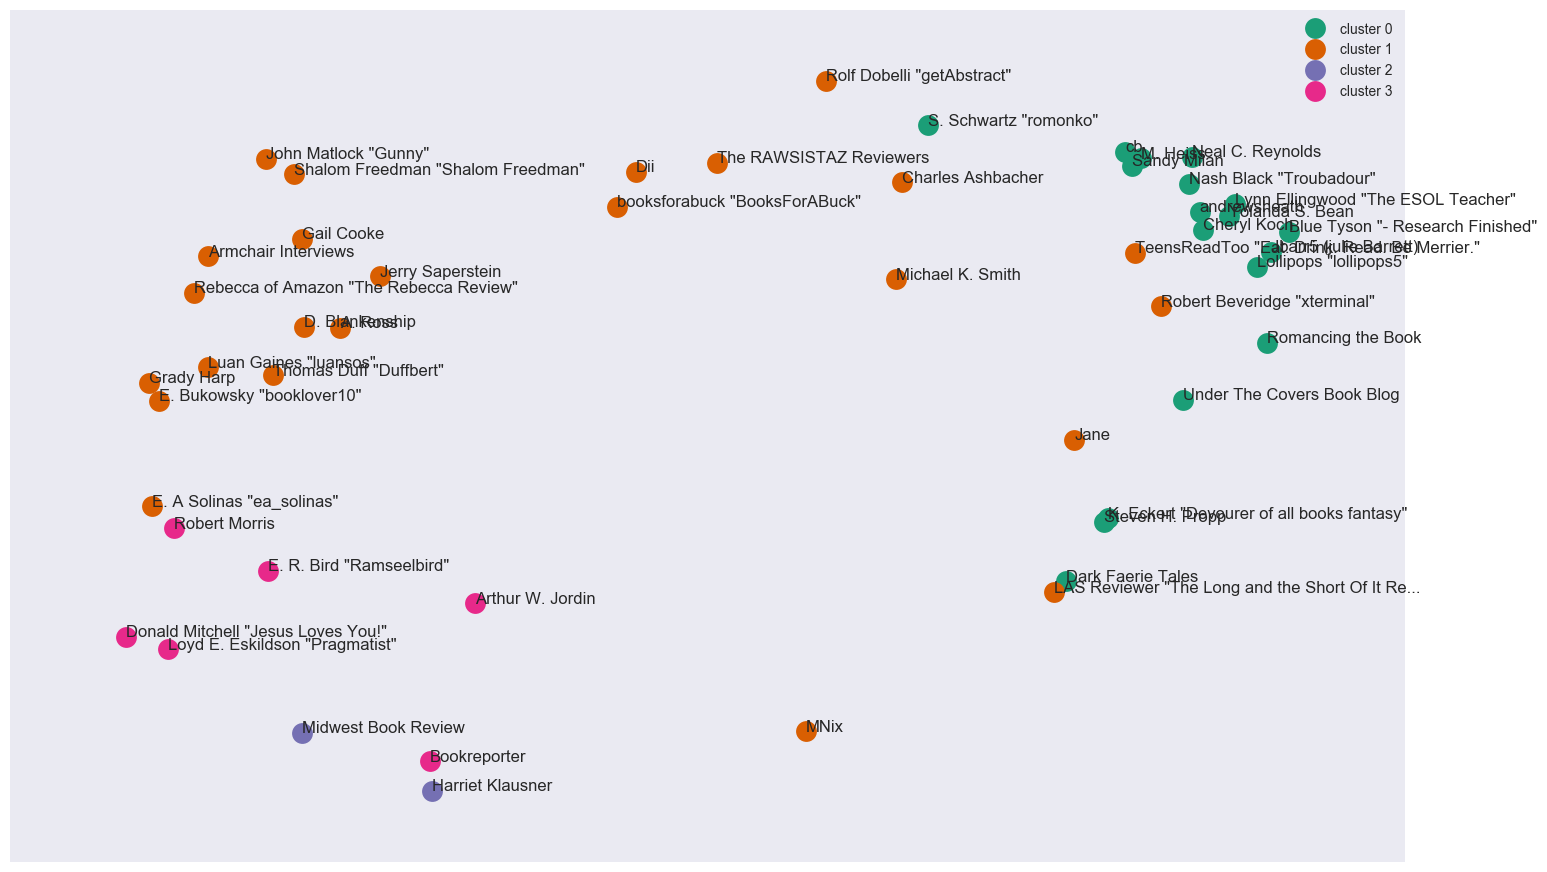

In [73]:
sns.set_style("dark")
#group by cluster
groups = df_all.groupby('clusterID')


# set up plot
fig, ax = plt.subplots(figsize=(18, 11)) # set size
ax.margins(0.1) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups:
    ax.plot(group['x_mds'], group['y_mds'], marker='o', linestyle='', ms=15, 
            label=cluster_names[name], color=cluster_colors[name], 
            mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='off')
    ax.tick_params(\
        axis= 'y',         # changes apply to the y-axis
        which='both',      # both major and minor ticks are affected
        left='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelleft='off')
    
ax.legend(numpoints=1)  #show legend with only 1 point

#add label in x,y position with the label as the film title
for i in range(len(df_all)):
    ax.text(df_all.ix[i]['x_mds'], df_all.ix[i]['y_mds'], df_all.ix[i]['reviewerName'], size=12)  

    
    
plt.show() #show the plot

#uncomment the below to save the plot if need be
#plt.savefig('clusters_small_noaxes.png', dpi=200)